<a href="https://colab.research.google.com/github/choibyoungjune/pythonbasic/blob/master/%EC%98%81%ED%99%94%EB%9E%AD%ED%82%B9_%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlopen
import re
from bs4 import BeautifulSoup as bs

#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
def charEncode(st) :
  #return st.split('charset=')[1].replace('">','')
  pt = r'charset[ ]*=[\']*[\"]*([\w-]+)[\"]*[\']*'
  
  return re.search(pt, st) and re.search(pt, st).group(1) or 'utf-8'
  
def urlHtml(url) :
  url_data = urlopen(url).read()
  urlcc = charEncode(str(url_data))
  html = url_data.decode(urlcc)
  return html

['그린 북', '가버나움', '베일리 어게인', '원더', '포드 V 페라리', '주전장', '아일라', '당갈', '쇼생크 탈출', '터미네이터 2:오리지널', '보헤미안 랩소디', '아이즈 온 미 : 더 무비', '덕구', '나 홀로 집에', '월-E', '라이언 일병 구하기', '살인의 추억', '사운드 오브 뮤직', '매트릭스', '인생은 아름다워', '헬프', '위대한 쇼맨', '빽 투 더 퓨쳐', '포레스트 검프', '클래식', '글래디에이터', '센과 치히로의 행방불명', '안녕 베일리', '토이 스토리 3', '타이타닉', '알라딘', '어벤져스: 엔드게임', '레옹', '죽은 시인의 사회', '집으로...', '동주', '반지의 제왕: 왕의 귀환', '헌터 킬러', '캐스트 어웨이', '아이 캔 스피크', '히든 피겨스', '굿바이 마이 프랜드', '굿 윌 헌팅', '여인의 향기', '서유기 2 - 선리기연', '주토피아', '쉰들러 리스트', '클레멘타인', '달링', '모노노케 히메']


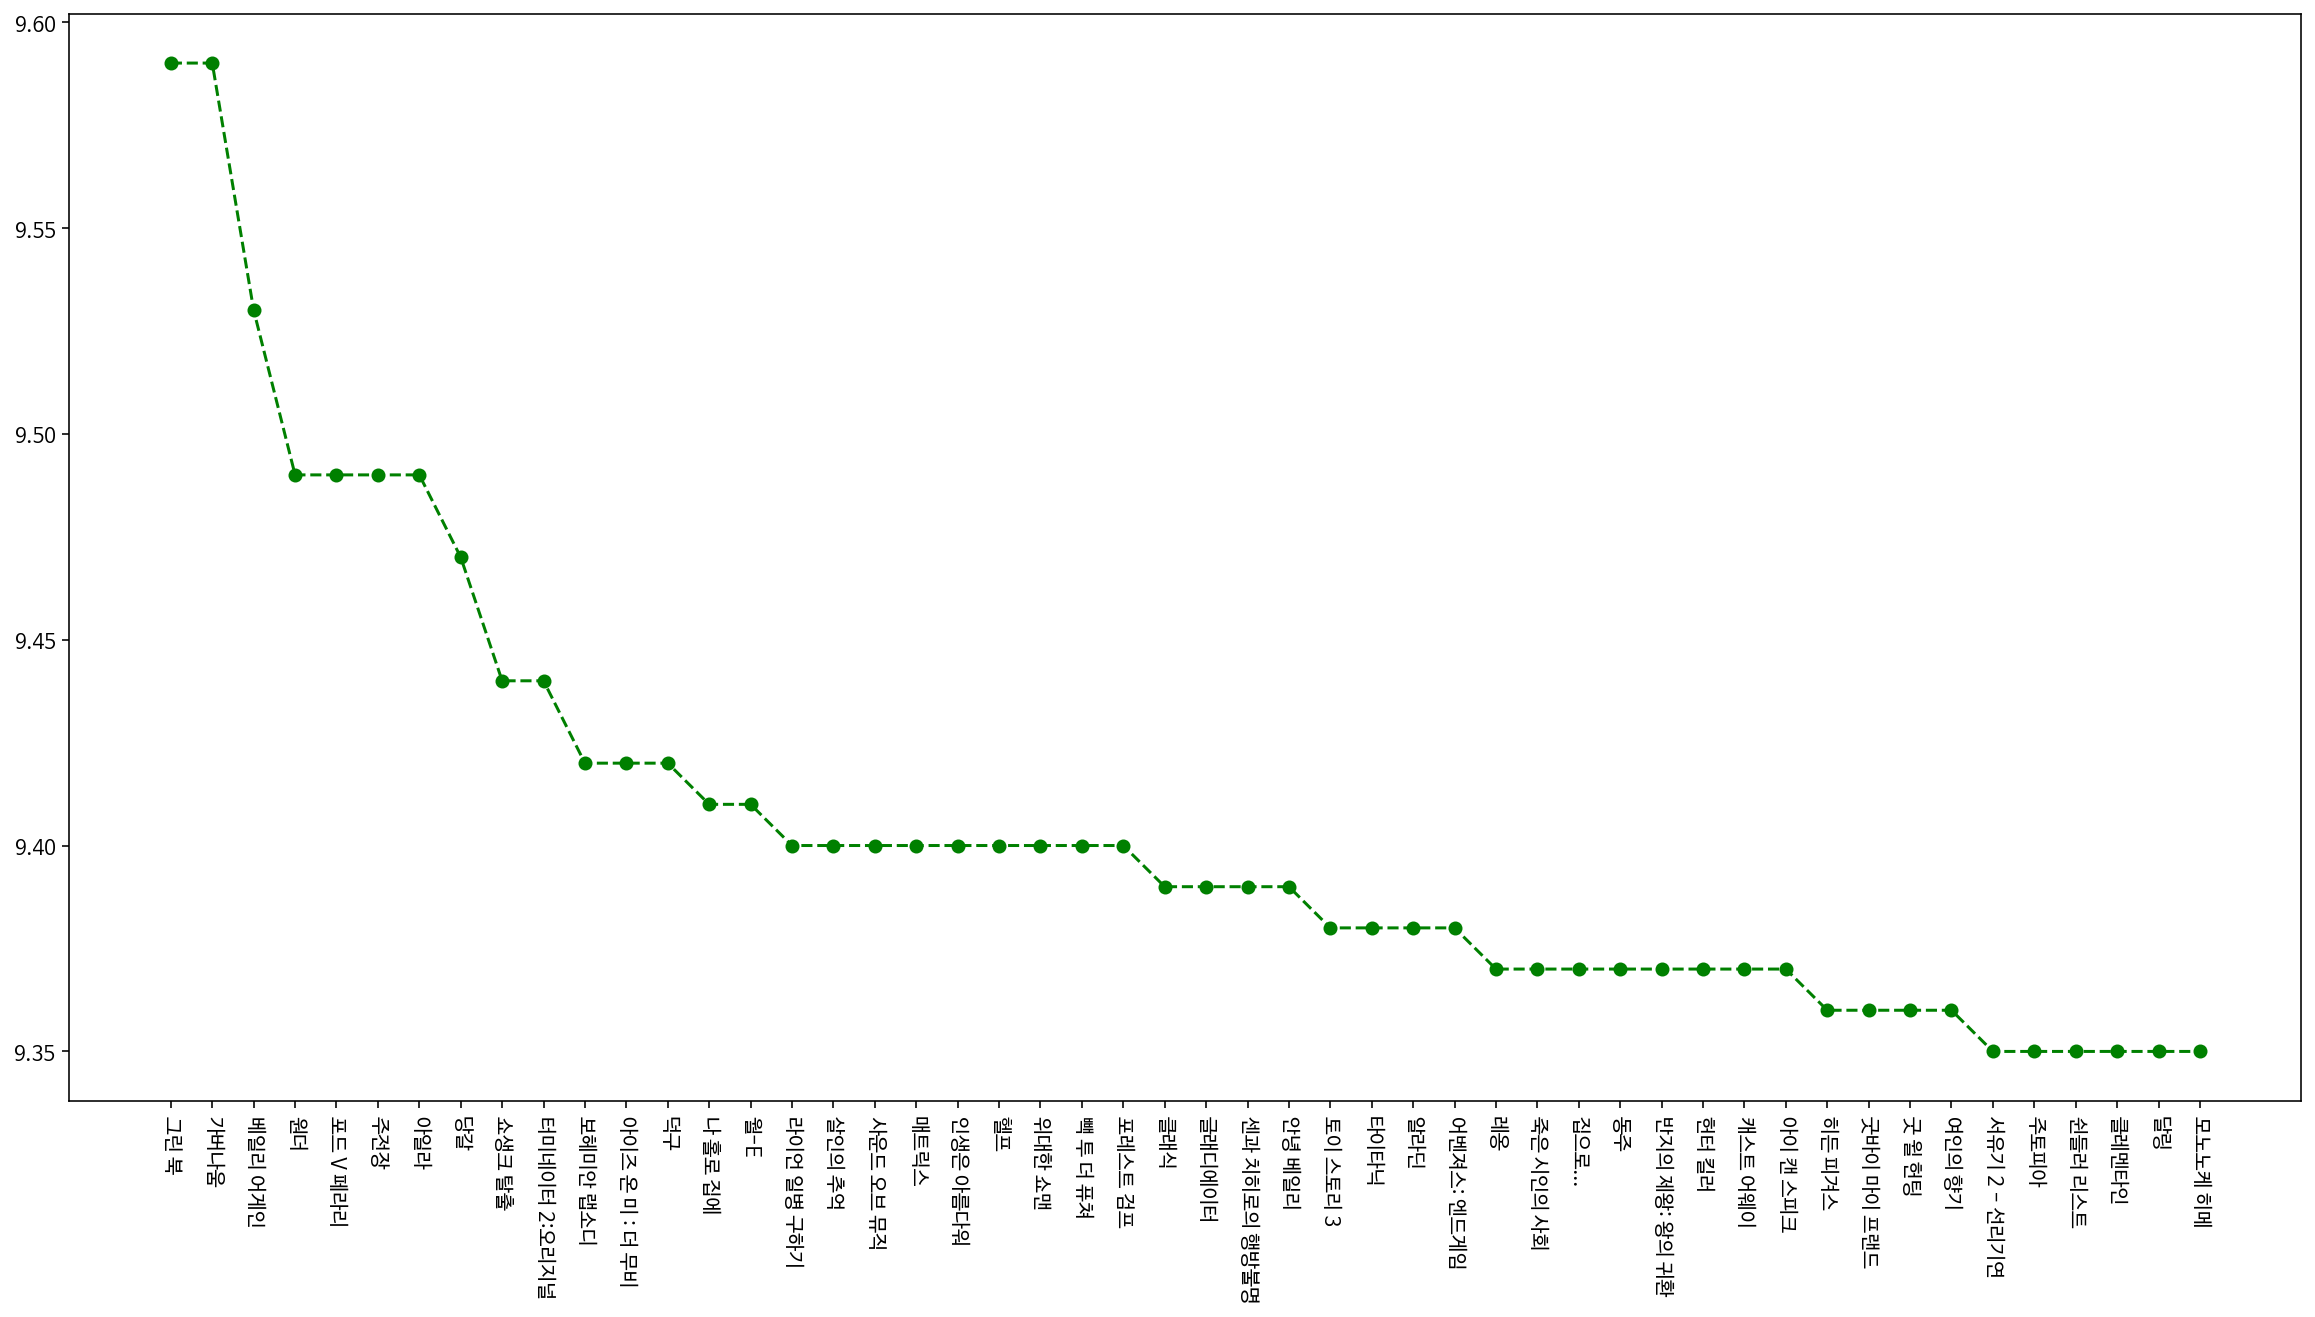

In [ ]:
html =urlHtml('https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200707') 
bshtml = bs(html, 'html.parser')

movieNm = bshtml.select(".tit5")
movieStar = bshtml.select(".point")

lst_name=[]
lst_star=[]
for item in list(zip(movieNm,movieStar)):
  lst_name.append(item[0].getText().replace('\n','').replace('\t','').lstrip())
  lst_star.append(float(item[1].getText().replace('\n','').replace('\t','').lstrip()))

plt.figure(figsize=(20,10))
plt.plot(lst_name, lst_star, 'go--')
plt.xticks(rotation=270)
plt.show()